Раньше вы уже встречались с понятием «корреляция».

## **Корреляция** — это статистическая взаимосвязь, присутствующая между двумя и более величинами, то есть некоторая линейная зависимость (например, между признаками).

Что же такое автокорреляция временного ряда?

### **Автокорреляция** — это статистическая взаимосвязь между последовательностями значений одного временного ряда, взятыми со сдвигом. Другими словами, автокорреляция говорит нам о том, насколько значение во временном ряду похоже на предыдущее значение.

Таким образом, автокорреляция — это корреляция ряда с самим собой (отсюда приставка «авто»), но со сдвигом во времени. Она помогает выявлять тенденции в данных и оценивать влияние ранее наблюдаемых значений на текущее наблюдение.

У автокорреляции много применений, но в первую очередь её используют для обработки сигналов, прогнозирования погоды и анализа рынка ценных бумаг. Иногда автокорреляция позволяет обнаружить скрытые тенденции.

Научиться находить автокорреляцию в Python довольно просто — далее мы разберём, когда и как можно применять эту функцию, а когда она может оказаться неэффективной. Но сначала рассмотрим несколько определений — чтобы построить график автокорреляции на Python, необязательно знать эти термины, однако их понимание позволит вам значительно лучше интерпретировать результаты.

+ **Лаг** — это предыдущее наблюдение (например, лаг в шесть дней относительно сегодняшнего дня указывает на значение чего-либо, полученное шесть дней назад).
+ **Положительная корреляция** — это отношение, при котором увеличение одного значения предсказывает увеличение другого.
+ **Отрицательная корреляция** — это отношение, при котором увеличение одного значения предсказывает уменьшение другого.
+ **Доверительный интервал** — это рассчитанный диапазон значений, в котором, вероятно, будет содержаться неизвестное (предсказанное) значение для наших данных.
+ **Уровень достоверности** — это вероятность того, что доверительный интервал будет содержать наблюдаемое значение (фактическое значение для предсказания).

Рассмотрим формулу автокорреляции. Мы уже знаем, что простой линейный коэффициент корреляции определяется по формуле:

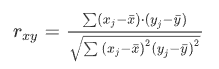

Как мы уже сказали, автокорреляция — это корреляция ряда с самим собой, сдвинутым во времени, а значит, в формуле автокорреляции вместо $x$ и $y$ будет сам временной ряд и значения этого сдвинутого временного ряда:

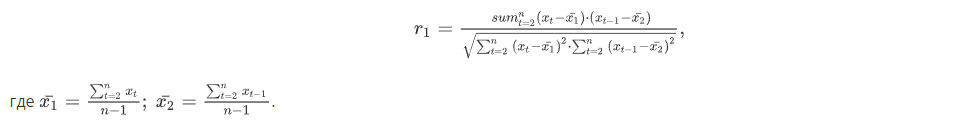

Так будет рассчитываться коэффициент автокорреляции первого порядка (он рассчитывает зависимость между уровнями ряда $t-1$ и $t$).

График автокорреляций разного порядка называется коррелограмма. Его довольно просто построить с помощью метода plot_acf из пакета statsmodels.graphics.tsaplots. Методу необходимо передать всё тот же временной ряд с индексом-датой.

Воспользуемся датасетом из примера сезонной декомпозиции, в котором представлены данные о количестве авиапассажиров в 1949–1960 годах.

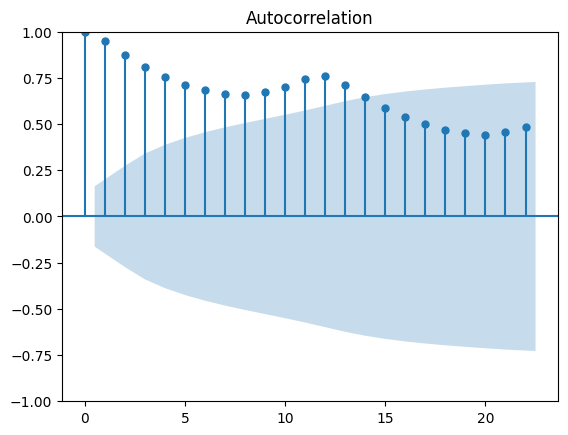

In [4]:
import pandas as pd
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=['Month'])
plot_acf(df);

На оси х коррелограммы расположен лаг (порядок), при котором вычисляется автокорреляция. Ось y показывает значение корреляции (от -1 до 1). Чем ближе значение корреляции к 1 или -1, тем выше зависимость, например:

+ пик при лаге, равном 1, показывает сильную зависимость между значениям ряда и предыдущим значением;
+ пик при лаге, равном 2, показывает сильную корреляцию между каждым значением и значением в более ранний момент на расстоянии 2 от данного.

Также можно встретить коррелограммы, похожие на гистограммы, но их смысл от этого не меняется.

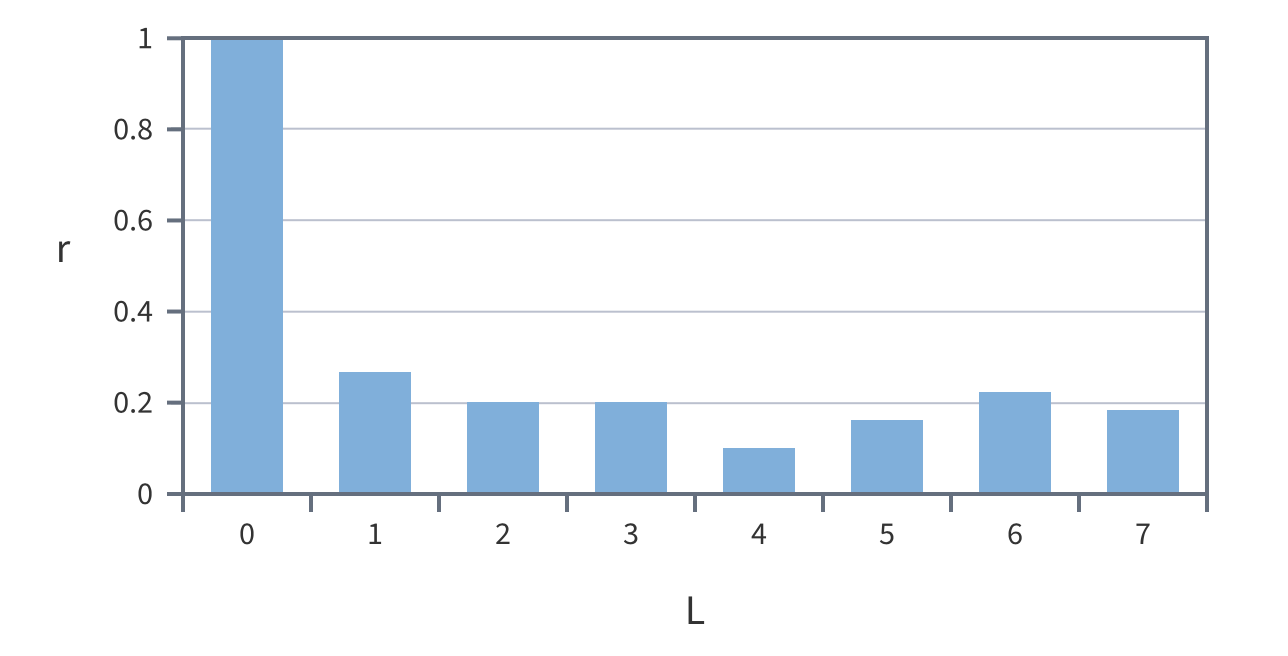

Для совершения предсказаний по данным временного ряда статистическими моделями, необходимо, чтобы во временном ряду присутствовала зависимость, а коррелограмма — хороший способ визуально определить наличие такой зависимости. Значения на коррелограмме будут близки к 0 в случае, если данные ряда не зависят от себя в прошлом. Если скрытая зависимость всё-таки имеется, то одно или несколько значений будут значительно отличаться.

# КАК ЧИТАТЬ КОРРЕЛОГРАММУ?

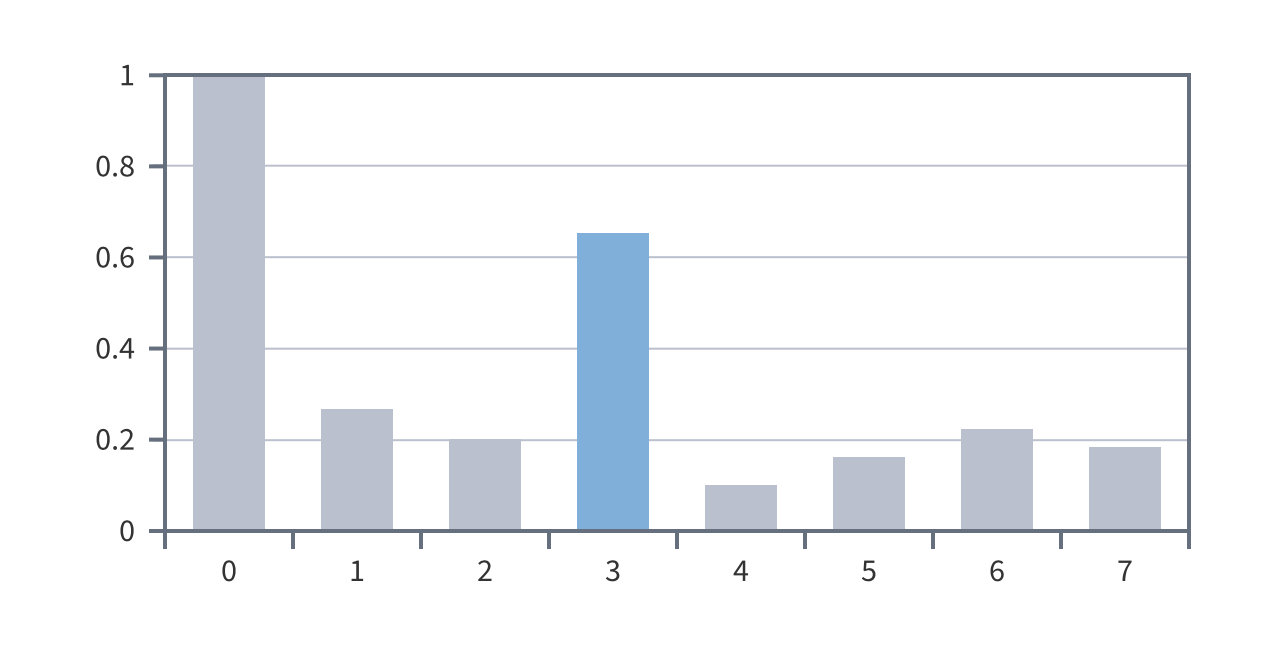

Если максимальное значение коррелограммы (не считая значения в нуле) оказывается выраженным для лага, равного $k$ (на рисунке выше $k=3$, то временной ряд содержит циклическую компоненту с периодом $k$. То есть данные являются зависимыми/схожими с данными, находящимися на расстоянии $k$ дней/недель и т. д.



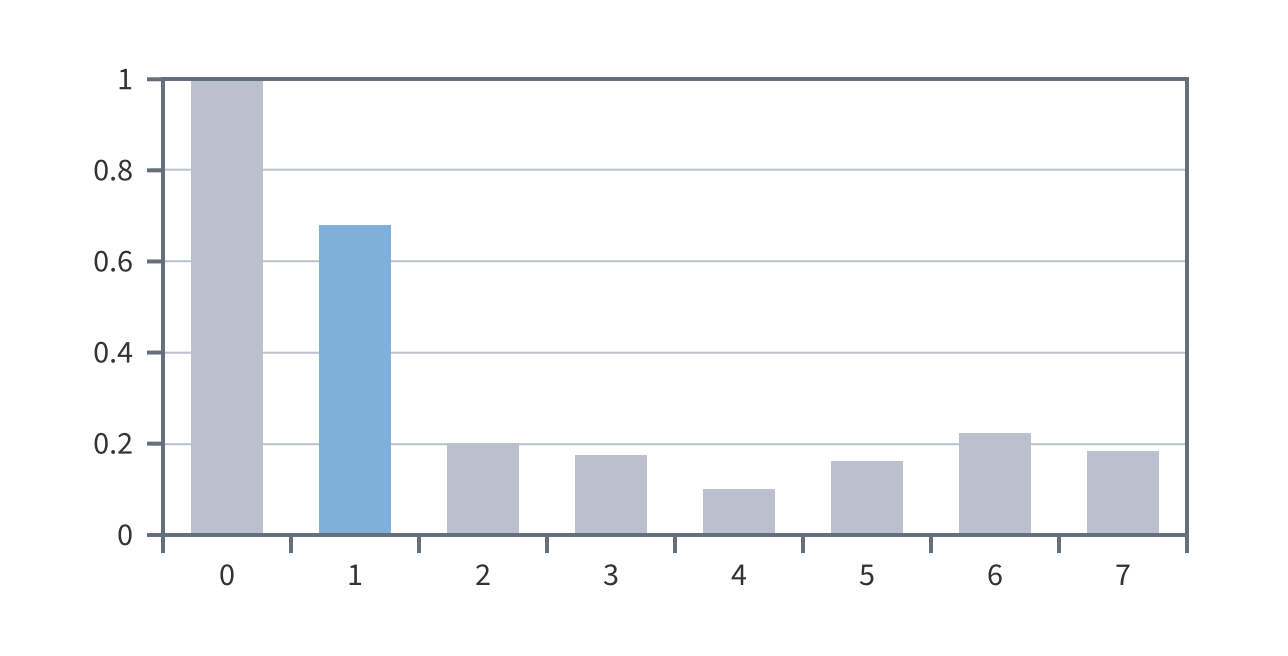

Если максимальное значение на коррелограмме находится в $k=1$, то ряд содержит только тенденцию (тренд).

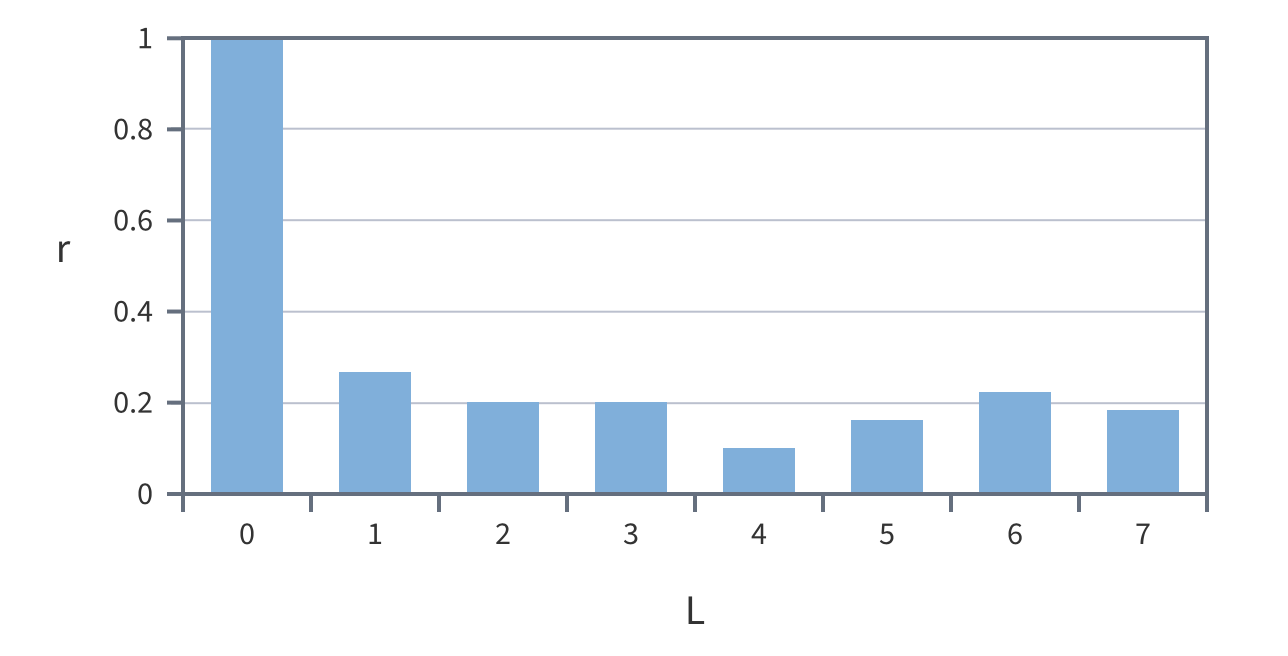

А если все значения на графике автокорреляции колеблются в районе $0$, то ряд не содержит циклической компоненты и тренда либо содержит нелинейный тренд, который не видно на коррелограмме (так как нелинейный тренд не может быть выражен линейным коэффициентом корреляции).

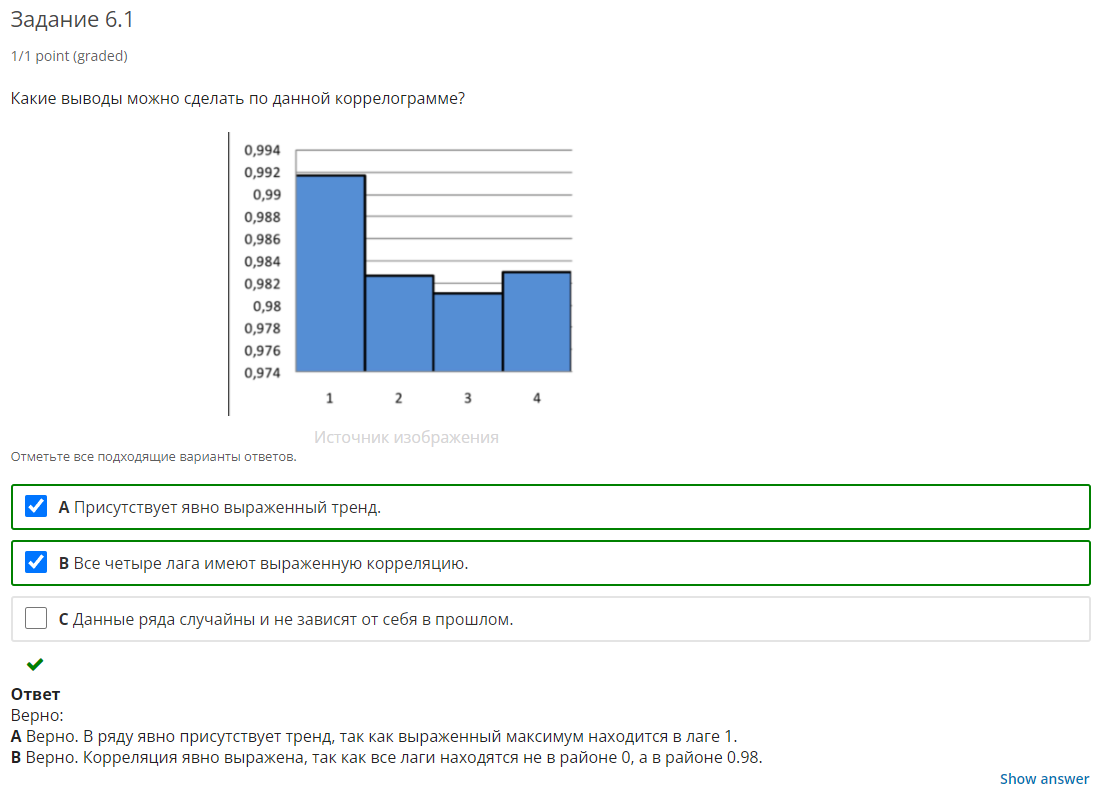

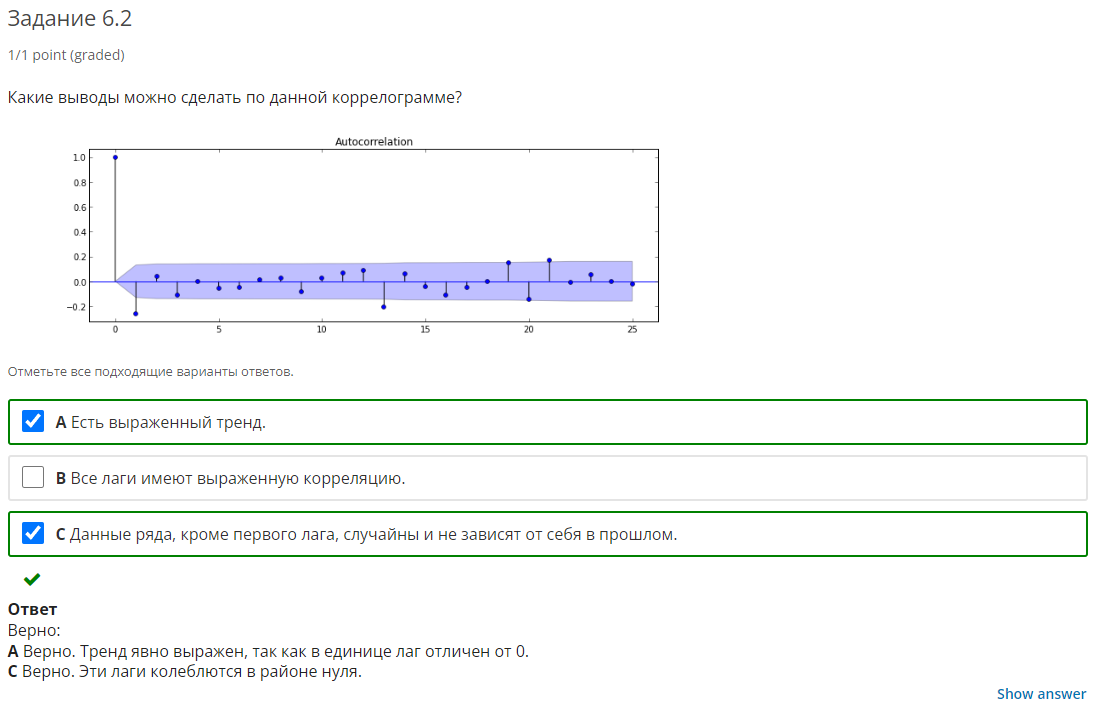

# ЧАСТИЧНАЯ АВТОКОРРЕЛЯЦИЯ

Для определения сезонного периода используется **частичная автокорреляция**. Она похожа на классическую автокорреляцию, однако дополнительно избавляется от линейной зависимости между сдвинутыми рядами. График частичной автокорреляции читается так же, как и коррелограмма.

Частичная автокорреляция строится с помощью метода plot_pacf из пакета statsmodels.graphics.tsaplots.



# АВТОКОРРЕЛЯЦИЯ ОСТАТКОВ

Помимо анализа временного ряда на наличие или отсутствие взаимозависимости, иногда смотрят автокорреляцию остатков модели. В хорошей модели остатки (ошибки) должны иметь случайный характер — это означает, что модель уловила все существующие зависимости.

Рассмотрим, как определять автокорреляцию остатков по графикам остатков (ошибок предсказания):

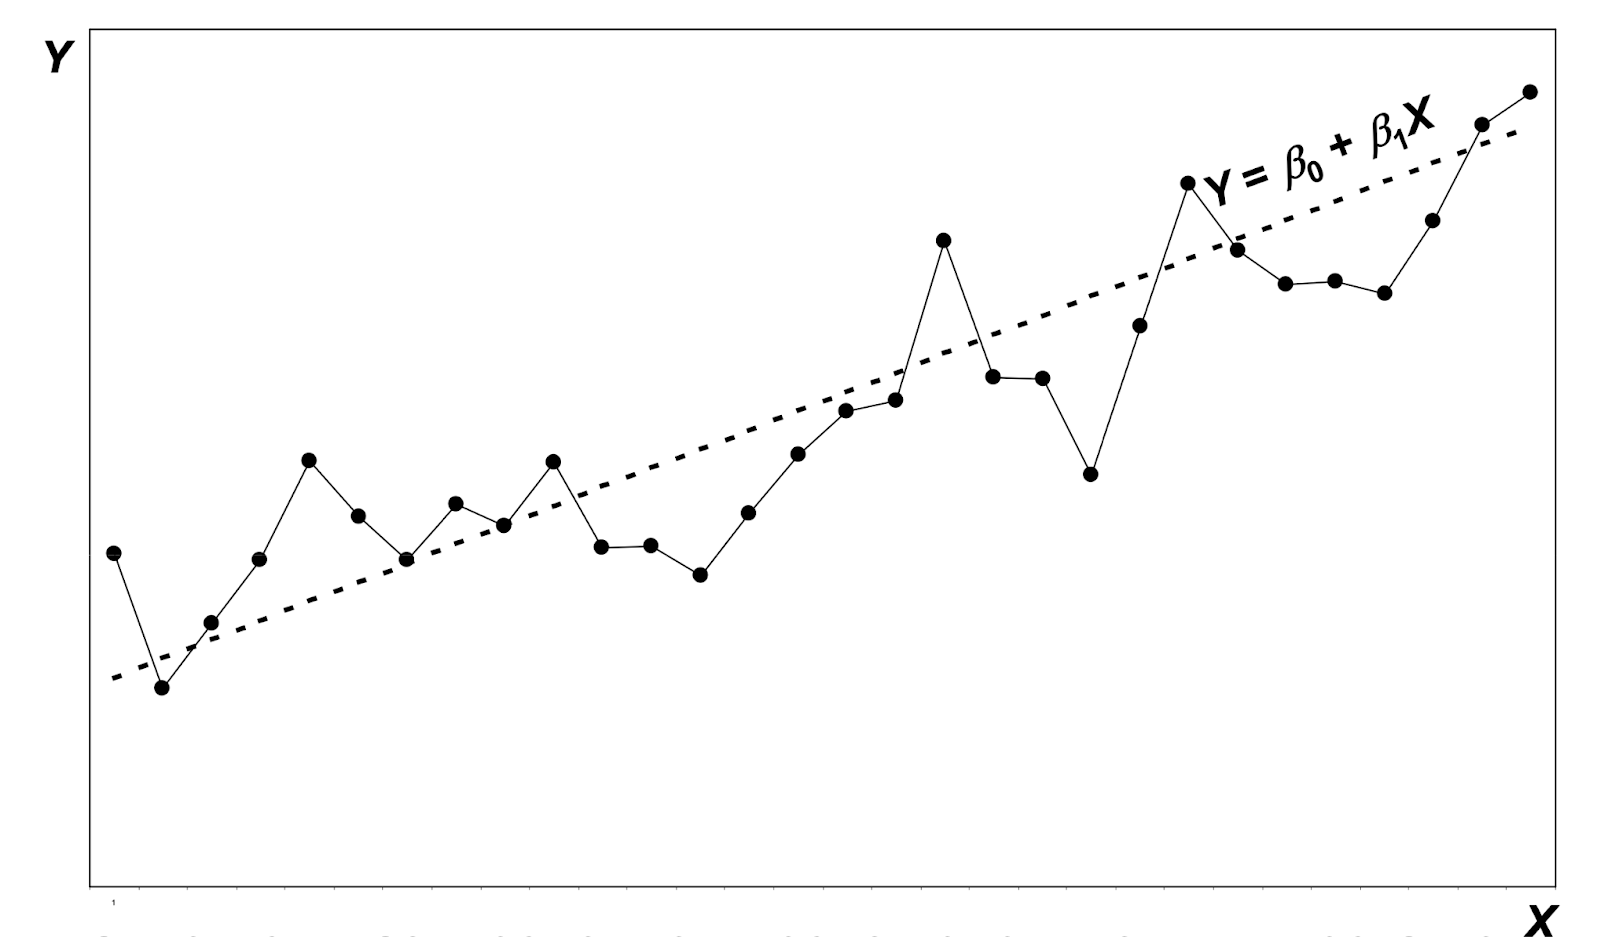

На графике выше в большинстве случаев после положительных остатков следуют положительные, а после отрицательных — отрицательные. Это пример положительной автокорреляции.

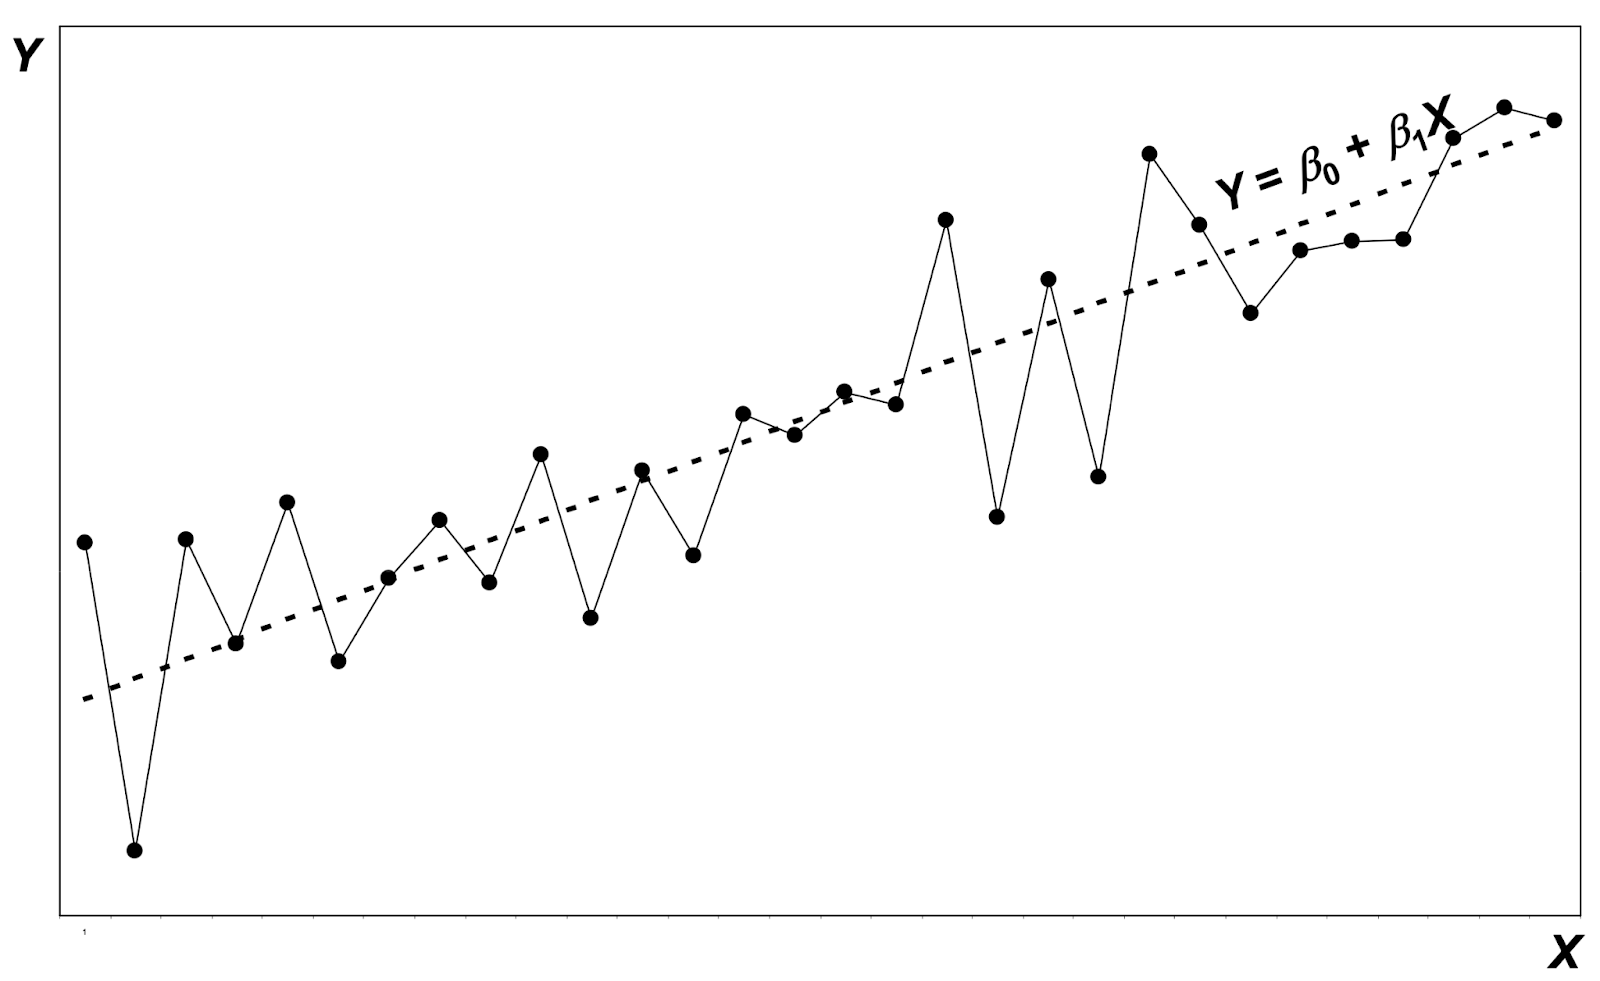

А в этом случае после положительных остатков чаще всего следуют отрицательные и наоборот, на графике — отрицательная автокорреляция.

## ПРИЧИНЫ АВТОКОРРЕЛЯЦИИ ОСТАТКОВ:

+ Если в остатках имеется автокорреляция (наличие зависимости), это значит, что какая-то зависимость осталась незамеченной для вашей модели — возможно, какие-то важные признаки не были учтены.
+ На появление автокорреляции в остатках может повлиять предварительное сглаживание данных, так как вы искусственно сглаживаете значения (накладывая соседние друг на друга, добавляя зависимость).

Остатки будут случайными, если автокорреляции нет. Статистически, а не только визуально проверить её наличие или отсутствие можно с помощью теста Дарбина — Уотсона. Пример применения теста на автокорреляцию остатков приведён в статье.

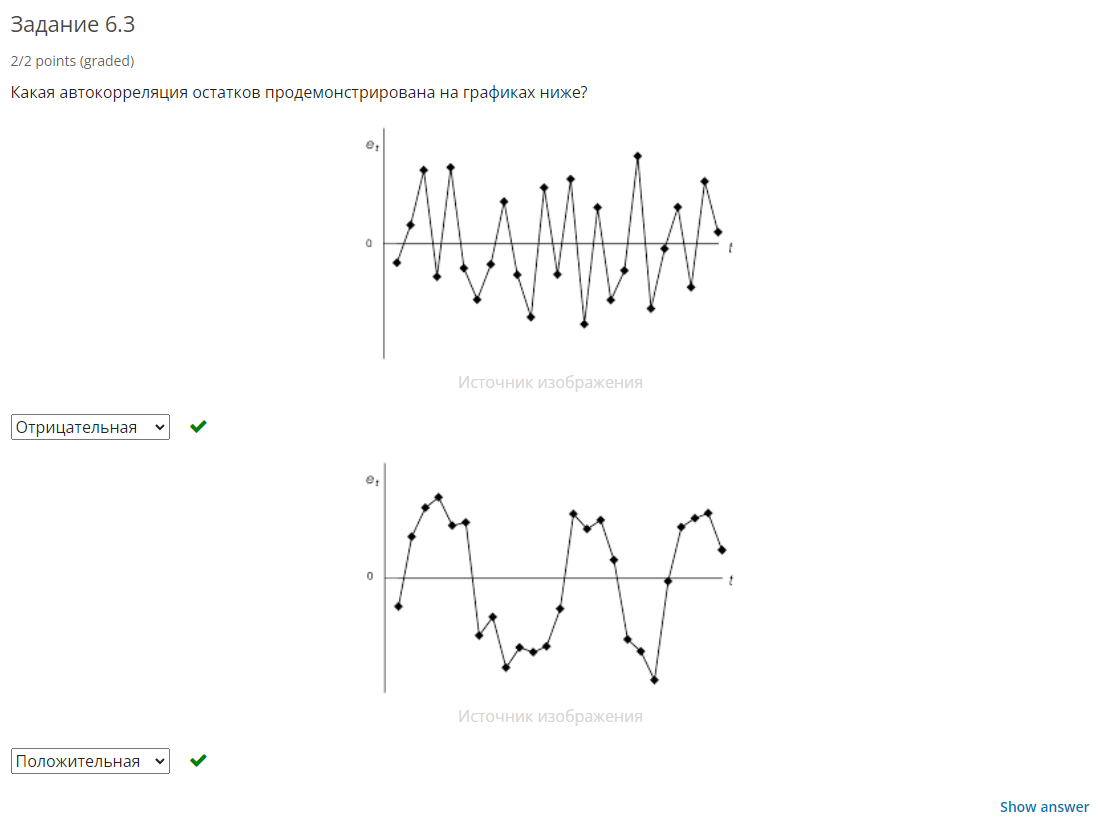

Если в остатках присутствует автокорреляция, скорее всего, предсказания будут далеки от реальных значений и лучше доработать модель, исправив перечисленные выше недочёты.

В следующем юните вы узнаете, как автокорреляция используется для предсказания →